<a href="https://colab.research.google.com/github/kangeunkyeong/dataAnalysis/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_03_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EC%83%81%EC%B2%AD%EB%82%A0%EC%94%A8_%EB%B0%B0%ED%8F%AC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 3. 공공데이터를 이용한 EDA 분석 - 기상청 데이터 분석

## [질문]
- **Q1. 우리나라 날씨측정 데이터(종관 데이터)의 최초 측정년도는?**
- **Q2. 우리나라에서 가장 더웠던 온도와 년월, 지역은?**
- **Q3. 우리나라에서 가장 추웠던 온도와 년월, 지역은?**
- **Q4. 제주에서 가장 더웠던/추웠던 온도와 년월은?**
- **Q5. 지점별 최고기온/최저기온은?**
- 등등

In [4]:
# (코랩에서) 코드 실행 후 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,192 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

---

### #파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 1. 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 3. 데이터 전처리하기 : 필요한 데이터만 추출하기
 4. 데이터 시각화하기 : 데이터 그래프로 나타내기
 5. 데이터 저장하기 :  파일로 저장하기

---

### #라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 멧플롯립 한글폰트 지정
plt.rc('font', family='NanumBarunGothic')  # 코랩 폰트
# plt.rc('font', family='Malgun Gothic')     # 윈도우 폰트
plt.rcParams['axes.unicode_minus'] = False

---

### 1.데이터 준비하기

- 기상청 사이트에서 날씨 데이터를 다운로드한다.
- 사이트에 가입하고 로그인해야 다운로드할 수 있다.
- https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- csv파일 다운로드해서 사용

---------

### 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기

In [3]:
filename = 'OBS_ASOS_MNH_20240423121211.csv'

df = pd.read_csv(filename, encoding='cp949')
df



,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
57021,296,북부산,2023-11,10.1,26.2,-3.5,1020.9,61.0,45.5,1.7,142.3,NaN
57022,296,북부산,2023-12,4.6,20.6,-8.6,1024.0,63.0,81.0,1.7,90.7,NaN
57023,296,북부산,2024-01,3.1,15.4,-8.5,1023.8,61.0,29.0,1.8,186.6,NaN
57024,296,북부산,2024-02,7.1,21.6,-2.8,1023.9,69.0,91.0,2.8,83.6,NaN


---

### 3.데이터 전처리하기 - 가공하기
- 함수 참고:  https://pandas.pydata.org/docs/reference/index.html

- 데이터 요약

In [7]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57026 entries, 0 to 57025
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  57026 non-null  int64  
 1   지점명                 57026 non-null  object 
 2   일시                  57026 non-null  object 
 3   평균기온(°C)            56396 non-null  float64
 4   최고기온(°C)            56828 non-null  float64
 5   최저기온(°C)            56803 non-null  float64
 6   평균현지기압(hPa)         54586 non-null  float64
 7   평균상대습도(%)           55829 non-null  float64
 8   월합강수량(00~24h만)(mm)  56733 non-null  float64
 9   평균풍속(m/s)           55865 non-null  float64
 10  합계 일조시간(hr)         55645 non-null  float64
 11  최심적설(cm)            12043 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.2+ MB


- 기술통계 정보

In [8]:
df.describe()

,지점,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
count,57026.000000,56396.000000,56828.000000,56803.000000,54586.000000,55829.000000,56733.000000,55865.000000,55645.000000,12043.000000
mean,187.178252,12.623330,24.335518,2.002211,1005.793658,69.856526,110.508094,2.312255,188.562886,8.174907
std,62.234934,9.161795,8.017339,10.779243,16.161863,9.895235,121.270841,1.285750,46.155000,14.814384
min,90.000000,-13.500000,-4.800000,-32.600000,911.800000,8.000000,0.000000,-0.400000,0.000000,0.000000
25%,135.000000,4.600000,17.900000,-6.600000,1001.100000,63.000000,30.500000,1.400000,158.700000,1.500000
50%,174.000000,13.100000,25.800000,1.200000,1008.600000,71.000000,68.300000,2.000000,189.100000,4.300000
75%,245.000000,20.900000,31.100000,11.400000,1015.900000,77.000000,146.000000,2.900000,219.000000,9.000000
max,296.000000,30.200000,41.000000,24.800000,1029.700000,99.000000,1364.200000,22.700000,1300.300000,293.600000


#### **1. 결측데이터 시각화**
missingno패키지는 pandas 데이터프레임 데이터에서 누락된 데이터를 찾고 시각화하는 기능 제공

In [9]:
!pip install missingno   ### 방대한 데이터에서, 결측은 데이터가 없다는 것,

- **행에 결측 데이터 시각화**

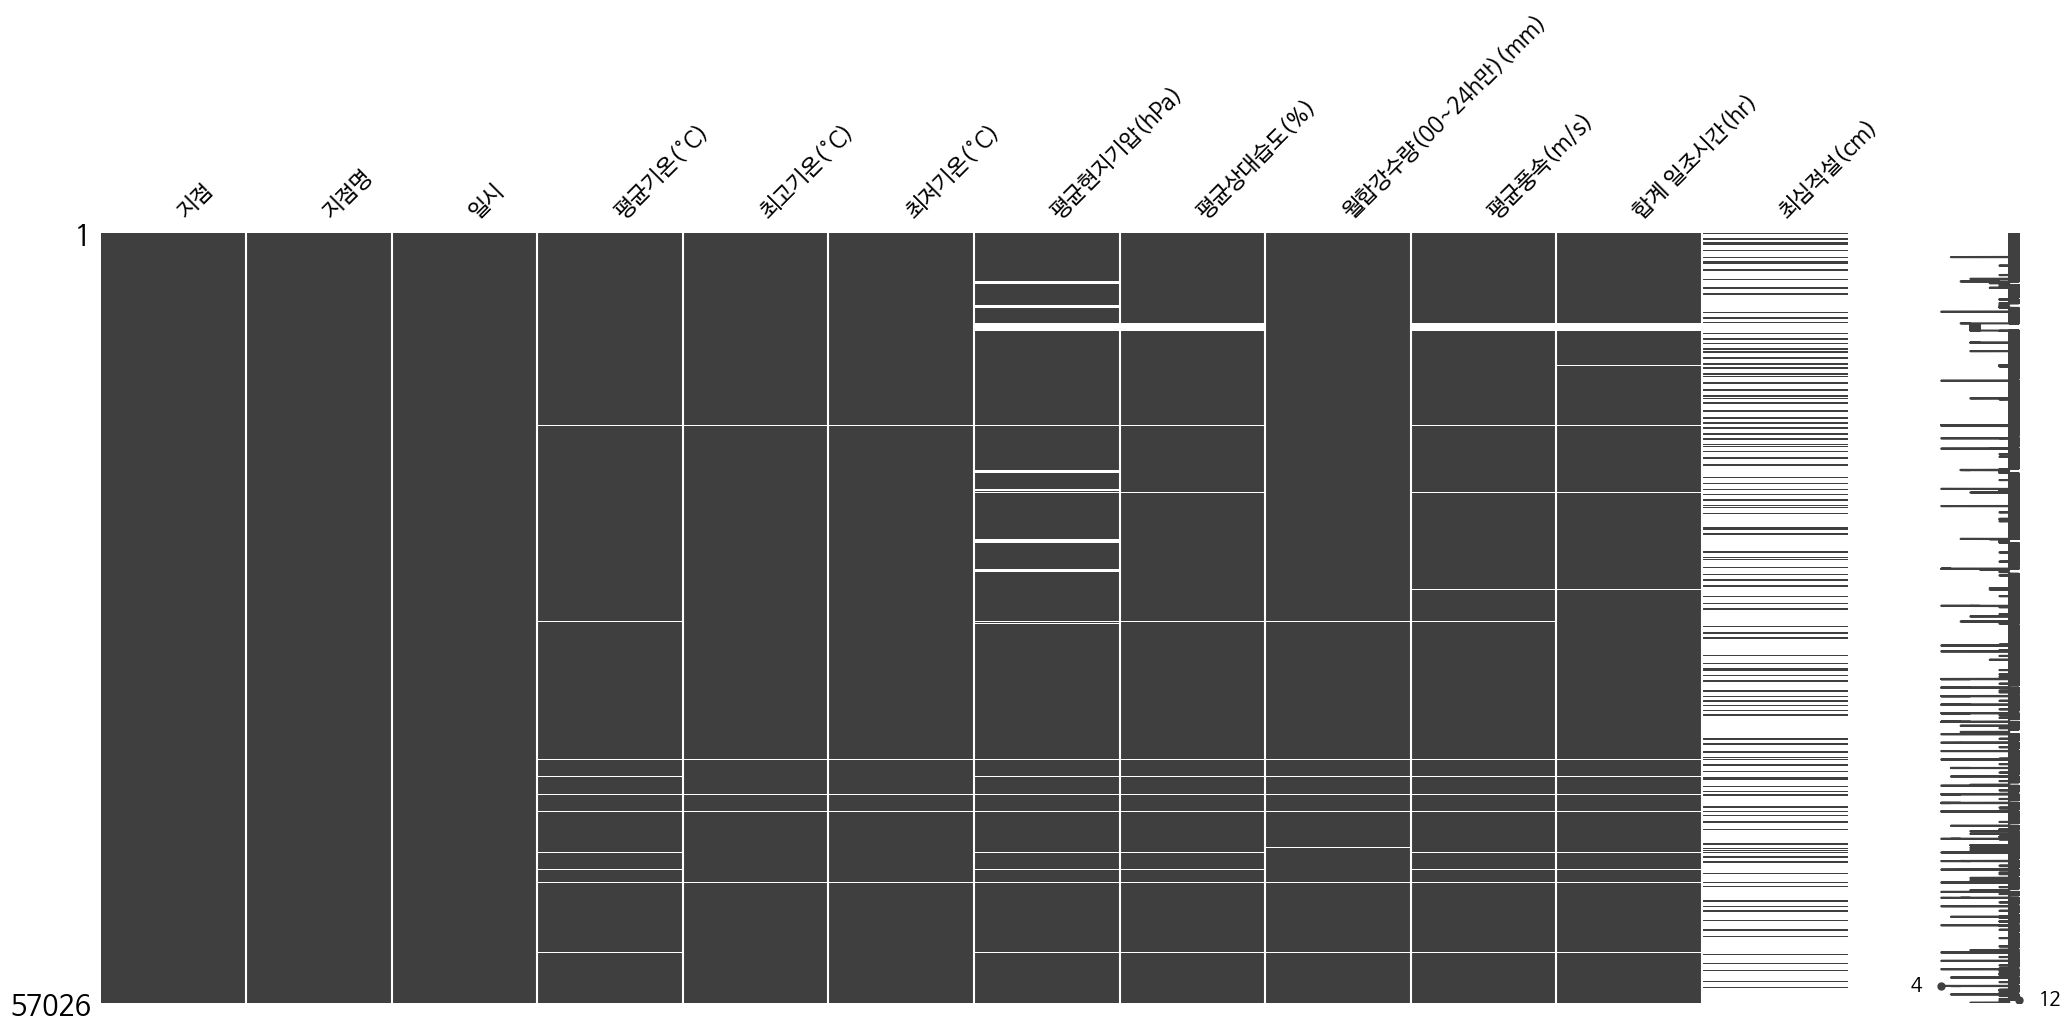

In [4]:
import missingno as msno
msno.matrix(df)
plt.show()

- **열에 결측 데이터 시각화**

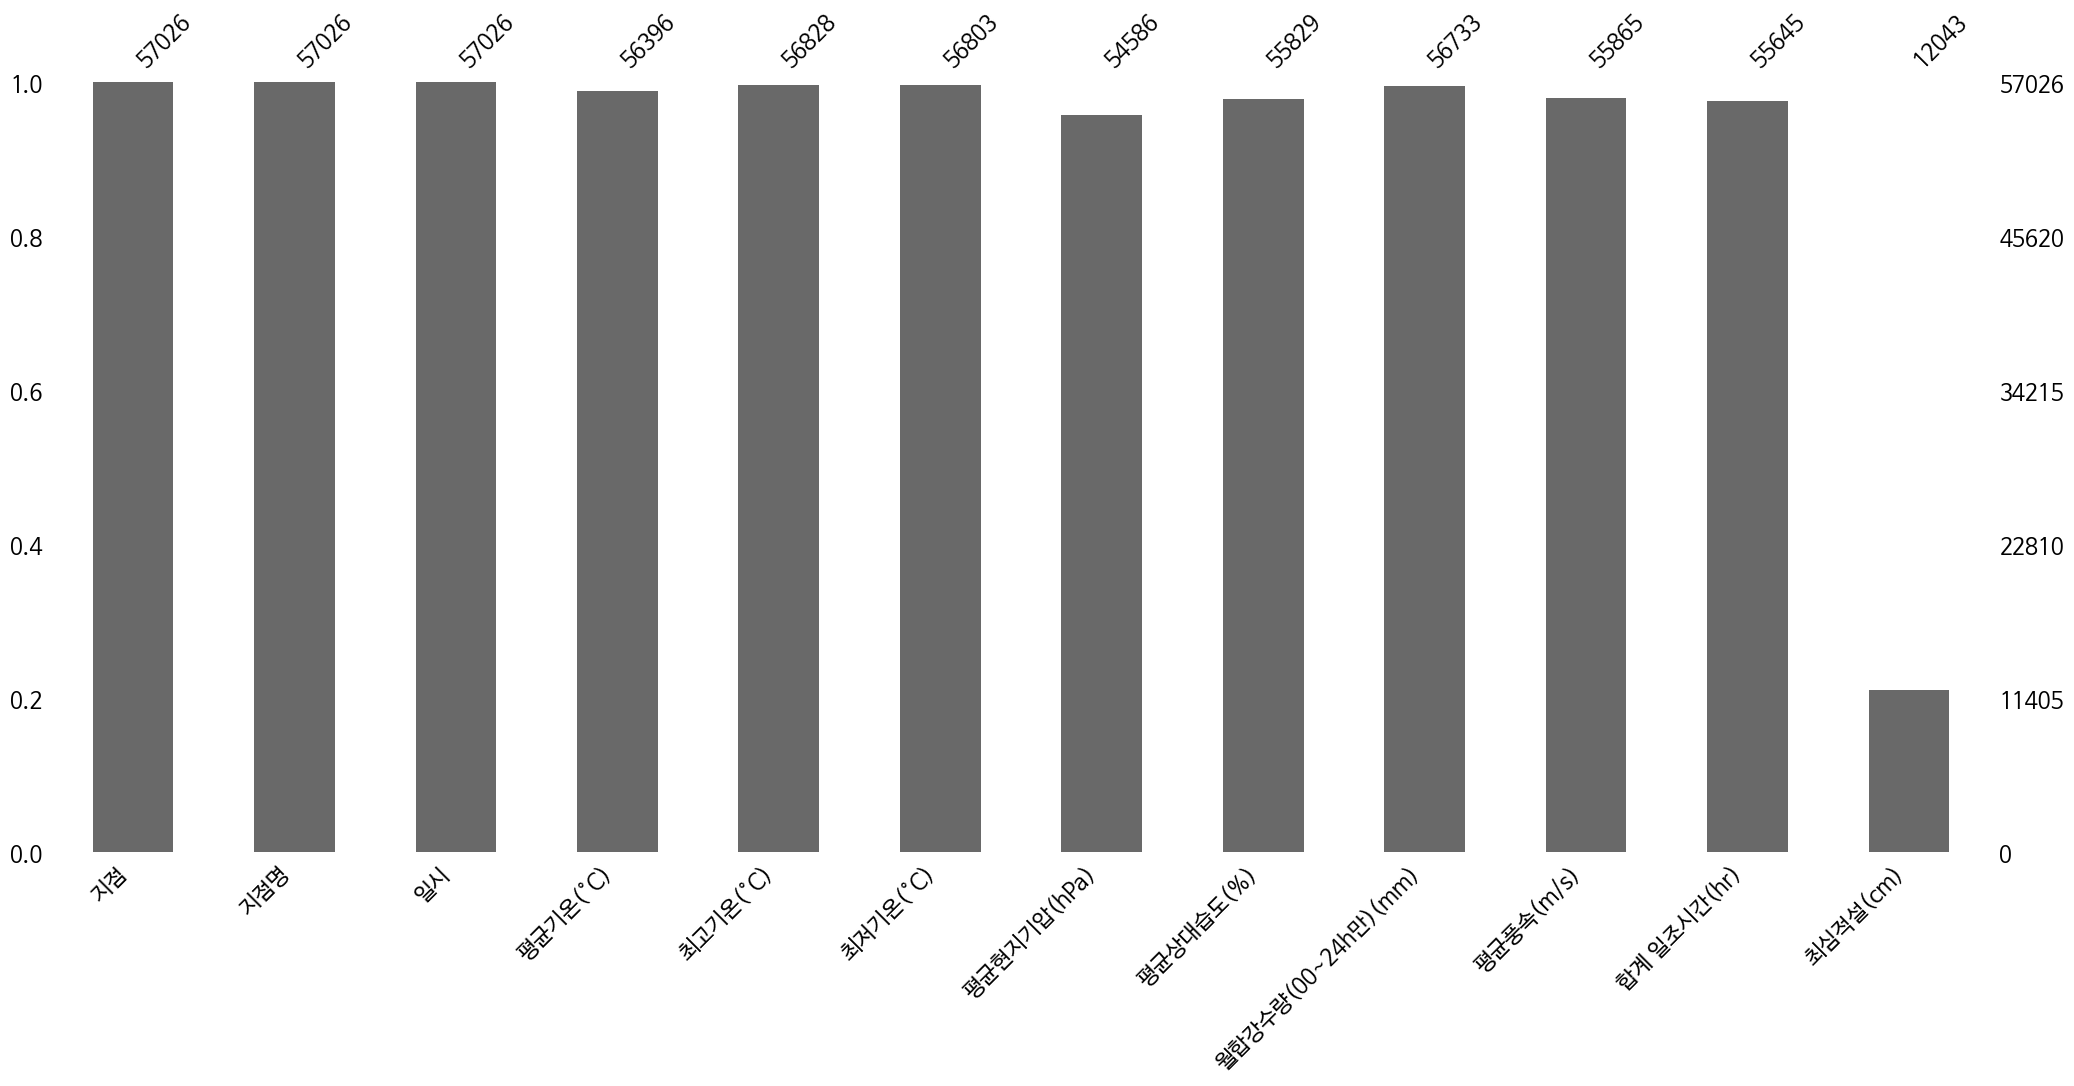

In [5]:
msno.bar(df)
plt.show()

---

#### **2. 컬럼명 변경하기**

In [6]:
# 컬럼명 변경하기 - ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온', '평균현지기압',
#                   '평균상대습도', '월합강수량', '평균풍속','일조시간', '최심적설']
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온', '평균현지기압',
              '평균상대습도', '월합강수량', '평균풍속','일조시간', '최심적설']
df.head()

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN


#### **3. 컬럼 추가하기 (df.insert())**
DataFrame.insert(추가하고싶은위치,컬럼명,값, allow_duplicate=False)

In [7]:
# 인덱스 3 위치에 '신규'란 이름으로 df['지점'] 데이터를 그대로 추가하기

df.insert(3, '신규', df['지점'])
df.head(2)

,지점,지점명,일시,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


In [23]:
df.drop(['검색일자'], axis=1, inplace=True)
df.head()

,지점,지점명,일시,년도,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968,90,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968,90,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN


In [25]:
# 인덱스 3 위치에 '검색일자'란 이름으로 df['일시'] 데이터를 그대로 추가하기
df.insert(3, '검색일자', df['일시'])
df.head(2)

,지점,지점명,일시,검색일자,년도,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968-01,1968,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968-02,1968,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


In [13]:
# 인덱스 3 위치에 '년도'란 이름으로 '일시'컬럼에서 년도 부분만 컬럼 추가하기

df.insert(3, '년도', df['일시'].str[:4])
df.head(2)

,지점,지점명,일시,년도,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,90,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,90,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


In [22]:
print(df['검색일자'].dtypes)


int64


- **문자열에서 특정 문자 제거**: '검색일자' 값중에 '년도-월-일' 형태로 되어 있는 구조에서  '-'기호를 제거

In [26]:
df['검색일자']= df['검색일자'].str.replace(pat='-', repl='')
df['검색일자']= df['검색일자'].str.replace('-', '')

df.head(2)

,지점,지점명,일시,검색일자,년도,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,196801,1968,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,196802,1968,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


- **데이터형 변환하기**: str(object)-->int64 형으로 변환하기

In [28]:
df['검색일자'] = df['검색일자'].apply('int64')
df['검색일자'].dtype


dtype('int64')

- **데이터형 변환하기**: int64 --> str(object)형으로 변환하기

In [29]:
df['검색일자'] = df['검색일자'].apply(str)
df.dtypes ## 데이터타입 전체를 볼 수도 있음

지점          int64
지점명        object
일시         object
검색일자       object
년도         object
신규          int64
평균기온      float64
최고기온      float64
최저기온      float64
평균현지기압    float64
평균상대습도    float64
월합강수량     float64
평균풍속      float64
일조시간      float64
최심적설      float64
dtype: object

#### **4. 컬럼 삭제**

In [32]:
# 앞에서 추가한 '신규', '검색일자' 컬럼 삭제하기
df.drop['신규', '검색일자']. axis=1, inplace=True
df.head(2)

SyntaxError: cannot assign to attribute here. Maybe you meant '==' instead of '='? (<ipython-input-32-14eace05f842>, line 2)

#### **5. 특정 조건 검색**

- 지점명 총개수와 고유한 지점명

In [30]:
# 지점명 총개수와 고유한 지점명
print( '#지점명 총개수: ', len(df.지점명.unique())  )
print( '#고유한 지점명: ',   df.지점명.unique())

#지점명 총개수:  104
#고유한 지점명:  ['속초' '북춘천' '철원' '동두천' '파주' '대관령' '춘천' '백령도' '북강릉' '강릉' '동해' '서울' '인천'
 '원주' '울릉도' '관악산' '수원' '영월' '충주' '서산' '울진' '청주' '대전' '추풍령' '안동' '상주' '포항'
 '군산' '대구' '전주' '울산' '창원' '광주' '부산' '통영' '무안' '목포' '여수' '흑산도' '완도' '고창'
 '순천' '진도(첨찰산)' '대구(기)' '홍성' '서청주' '제주' '고산' '성산' '서귀포' '진주' '강화' '양평'
 '이천' '인제' '홍천' '삼척' '태백' '정선군' '제천' '보은' '천안' '보령' '부여' '금산' '세종' '부안'
 '임실' '정읍' '남원' '장수' '고창군' '영광군' '김해시' '순창군' '북창원' '주암' '양산시' '보성군' '강진군'
 '장흥' '해남' '고흥' '의령군' '함양군' '성산포' '광양시' '진도군' '봉화' '영주' '문경' '청송군' '영덕'
 '의성' '구미' '영천' '경주시' '거창' '합천' '밀양' '산청' '거제' '남해' '북부산']


In [17]:
# '2023'년도 데이터만 추출하여 df_2023으로 지정하기
df_2023 = df[df.년도 == '2023']
df_2023.head(2)

,지점,지점명,일시,년도,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
660,90,속초,2023-01,2023,90,90,0.2,15.1,-16.0,1019.9,45.0,94.7,2.0,215.7,NaN
661,90,속초,2023-02,2023,90,90,2.7,15.6,-6.4,1022.3,53.0,43.4,1.9,186.6,NaN


In [18]:
# '2023'년도 지점명 총개수와 고유한 지점명
print( '#2023년도 지점명 총개수: ', len(df_2023.지점명.unique()) )
print( '#2023년도 고유한 지점명: ',  df_2023.지점명.unique() )

#2023년도 지점명 총개수:  97
#2023년도 고유한 지점명:  ['속초' '북춘천' '철원' '동두천' '파주' '대관령' '춘천' '백령도' '북강릉' '강릉' '동해' '서울' '인천'
 '원주' '울릉도' '수원' '영월' '충주' '서산' '울진' '청주' '대전' '추풍령' '안동' '상주' '포항' '군산'
 '대구' '전주' '울산' '창원' '광주' '부산' '통영' '목포' '여수' '흑산도' '완도' '고창' '순천' '홍성'
 '서청주' '제주' '고산' '성산' '서귀포' '진주' '강화' '양평' '이천' '인제' '홍천' '태백' '정선군' '제천'
 '보은' '천안' '보령' '부여' '금산' '세종' '부안' '임실' '정읍' '남원' '장수' '고창군' '영광군' '김해시'
 '순창군' '북창원' '양산시' '보성군' '강진군' '장흥' '해남' '고흥' '의령군' '함양군' '광양시' '진도군' '봉화'
 '영주' '문경' '청송군' '영덕' '의성' '구미' '영천' '경주시' '거창' '합천' '밀양' '산청' '거제' '남해'
 '북부산']


In [19]:
# 24-03월 측정 지점 갯수
len(df[df.일시 == '2024-03'].지점명.unique())

97

- **특정 컬럼명 검색** : 지점명=='제주' 데이터

- **또는(|) , 포함(in)** 조건 사용: '제주' 또는 '서귀포' 데이터 추출

In [ ]:
# 또는(|) 사용
df[(df.지점명 == '제주') | (df.지점명 == '고산') | (df.지점명 == '성산')| (df.지점명 == '성산포') | (df.지점명 == '서귀포')]

# in 사용
df.query("지점명 in ('제주', '고산', '성산', '성산포', '서귀포)")

- **그리고(&)** 조건 사용

In [42]:
#측정지점이 서울권이면서 최고기온이 36도 이상
df [ ((df.지점명 == '서울') | (df.지점명 == '관악산')) &(df.최고기온 > 35)]


,지점,지점명,일시,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
5332,108,서울,1909-08,108,25.3,35.6,19.8,NaN,77.0,216.1,3.7,173.3,NaN
5391,108,서울,1914-07,108,26.1,35.6,19.4,NaN,84.0,289.1,2.7,204.4,NaN
5426,108,서울,1917-06,108,21.5,36.7,9.7,NaN,68.0,72.0,2.5,257.9,NaN
5427,108,서울,1917-07,108,25.7,36.6,17.7,NaN,81.0,223.9,2.2,274.2,NaN
5428,108,서울,1917-08,108,24.8,36.6,16.4,NaN,78.0,299.7,2.5,243.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,108,서울,2019-08,108,27.2,36.8,18.5,996.9,69.0,190.5,1.6,239.3,NaN
6647,108,서울,2020-06,108,23.9,35.4,14.8,996.2,68.0,139.6,2.3,206.1,NaN
6660,108,서울,2021-07,108,28.1,36.5,19.6,998.1,71.0,168.3,2.0,195.2,NaN
6672,108,서울,2022-07,108,27.3,36.1,20.8,995.6,77.0,252.3,2.1,140.1,NaN


### [실습문제] 관측 지점이 제주도 내부에 있는 관측소 데이터 검색

In [ ]:
# 포함(in) 사용  ### 쿼리 문으로 사용

df.query("지점명 in ('제주', '고산', '성산', '성산포', '서귀포)")

### **Q1. 우리나라 날씨측정 데이터(종관 데이터)의 최초 측정년도는?**

- **min()** : 최초 측정월, 마지막 측정월

In [45]:
# 최초 측정월, 마지막 측정월
#print ( '최초 측정일시: ', min(df.일시)  )
#print ( '최근 측정일시: ', max(df.일시)  )



print ( '최초 측정일시: ', df.일시.min()  )
print ( '최근 측정일시: ', df.일시.max()  )



최초 측정일시:  1904-04
최근 측정일시:  2024-03


In [51]:
# 최초 측정월을 입력으로 받아서 조건 검색하기

df[df.일시 == df.일시.min()]

df.query(f"일시 == 'df.일시.min()' ")


,지점,지점명,일시,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설


- **max()** : 최근 측정 월 데이터 추출하기

In [52]:
# 최근 측정 월 데이터 추출하기

df[df.일시 == df.일시.max()]

df.query(f"일시 == 'df.일시.max()' ")

,지점,지점명,일시,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설


In [20]:
# 지점명이 '제주'인 최근 측정 데이터
# df[ (df.지점명=='제주') df.일시 == df.일시.max()]



In [ ]:
# 제주내의 지점들의 최근 측정 데이터



### **Q2. 우리나라에서 가장 더웠던 온도와 년월, 지역은?**

In [ ]:
# 컬럼 추출


# 행 추출



In [ ]:
# 전체 최고기온
df.query(f" 최고기온 == {df['최고기온'].max()} ")

# 전체 최고기온 일시
df.query(f" 최고기온 == {df['최고기온'].max()} ")['일시'].str[0:4]

# 전체 최고기온 지점명
df.query(f" 최고기온 == {df['최고기온'].max()} ")['지점명'].iloc[0]


In [ ]:
# 행 추출 특정 컬럼값(년월) 추출
yymm =
print(f'기상관측 데이터를 통해 가장 더웠던 년-월: {yymm}')


# 행 추출 특정 컬럼값(최고기온) 추출



### **Q3. 우리나라에서 가장 추웠던 온도와 년월, 지역은?**

### **Q4. 제주에서 가장 더웠던/추웠던 온도와 년월은?**

In [ ]:
# 제주에서 가장 더웠던 데이터





### **[실습문제] 서울에서 가장 더웠던/추웠던 온도와 년월은?**

--------

#### **6. 그룹핑(Grouping)**

#### #그룹핑: 지점별  

In [33]:
# 지점명별 숫자 컬럼의 평균값
df.groupby('지점명').mean(numeric_only=True).head(5)

,지점,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
지점명,,,,,,,,,,,
강릉,105.0,105.0,12.578892,25.015373,2.278582,1013.744905,64.008975,112.423169,2.906283,190.126842,17.191809
강진군,259.0,259.0,13.691228,25.051445,3.321965,1015.295906,72.216374,119.375145,2.311047,182.228324,7.450000
강화,201.0,201.0,11.106504,22.424199,0.117788,1012.361789,70.482927,107.881132,1.744553,202.404241,4.911034
거제,294.0,294.0,14.184065,24.353933,4.587480,1012.983415,66.889431,156.124020,1.777236,196.593148,3.147727
거창,284.0,284.0,11.761951,25.098077,-0.363942,989.887752,70.035772,105.748548,1.337724,199.933605,5.467901


In [35]:
# 지점명별 해당 컬럼의 데이터 빈도수
df.groupby(['지점명'], as_index=False).count()   # 그룹핑 컬럼으로 인덱스를 지정하지 않을 때
df.groupby('지점명').count().reset_index()       # 인덱스 리셋 (셋 인덱스도 있음)

df.groupby('지점명').count()                     # 그룹핑한 컬럼이 인덱스로 만들어진다

,지점,일시,검색일자,년도,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
지점명,,,,,,,,,,,,,,
강릉,1340,1340,1340,1340,1340,1336,1340,1340,1158,1337,1338,1337,1330,293
강진군,173,173,173,173,173,171,173,173,171,171,173,172,173,14
강화,636,636,636,636,636,615,624,624,615,615,636,615,613,145
거제,624,624,624,624,624,615,623,623,615,615,612,615,613,44
거창,625,625,625,625,625,615,624,624,596,615,620,615,613,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
합천,618,618,618,618,618,615,615,615,614,615,613,614,613,91
해남,633,633,633,633,633,615,631,631,615,615,622,614,613,131
홍성,101,101,101,101,101,101,101,101,101,101,101,101,101,23


#### #그룹핑(컬럼1개): 지점별  평균기온

In [36]:
# 방법1
df['평균기온'].groupby(df['지점명']).mean()  ### 시리즏 데이타 형태


지점명
강릉     12.578892
강진군    13.691228
강화     11.106504
거제     14.184065
거창     11.761951
         ...    
합천     13.027154
해남     13.395285
홍성     12.490099
홍천     10.531220
흑산도    13.541590
Name: 평균기온, Length: 104, dtype: float64

In [37]:
# 방법2
df.groupby('지점명')['평균기온'].agg('mean')   ### 시리즈데이터 형태

지점명
강릉     12.578892
강진군    13.691228
강화     11.106504
거제     14.184065
거창     11.761951
         ...    
합천     13.027154
해남     13.395285
홍성     12.490099
홍천     10.531220
흑산도    13.541590
Name: 평균기온, Length: 104, dtype: float64

In [39]:
# 방법3
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean'})     ### 판다스 데이터 형태로 보여줌



,평균기온
지점명,
강릉,12.578892
강진군,13.691228
강화,11.106504
거제,14.184065
거창,11.761951
...,...
합천,13.027154
해남,13.395285
홍성,12.490099


<Axes: xlabel='지점명'>

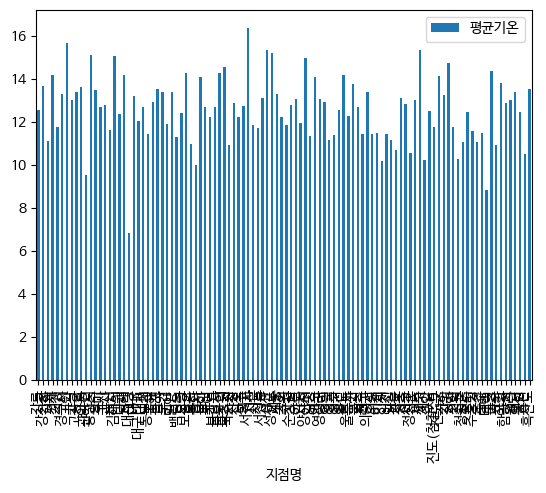

In [41]:
# 그래프 그리기
df.groupby('지점명').aggregate({'평균기온':'mean'}).plot(kind='bar')   ### 그래프 지정 안해줄 때는 기본이 선 그래프로 나옴

In [42]:
# 지점명별 평균기온, 최고기온,최저기온 그룹핑하기
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean',
                                    '최고기온':'max',
                                    '최저기온':'min'})

,평균기온,최고기온,최저기온
지점명,,,
강릉,12.578892,28.5,-5.2
강진군,13.691228,27.8,-2.7
강화,11.106504,26.7,-8.8
거제,14.184065,28.3,-1.6
거창,11.761951,27.7,-5.3
...,...,...,...
합천,13.027154,29.0,-4.1
해남,13.395285,27.7,-2.7
홍성,12.490099,27.6,-3.2


#### #그룹핑(컬럼 2개): 지점명+년도별,  평균기온

In [43]:
df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균':'mean'})
df.groupby(['지점명','년도']).aggregate({'평균기온':'mean'})
#df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균기온':'mean'}).reset_index()

평균기온
지점명 년도             
강릉  1911        NaN
    1912  11.733333
    1913  11.683333
    1914  13.175000
    1915  12.091667
...             ...
흑산도 2020  14.100000
    2021  15.258333
    2022  13.983333
    2023  14.308333
    2024   6.466667

[4849 rows x 1 columns]

<Axes: xlabel='지점명,년도'>

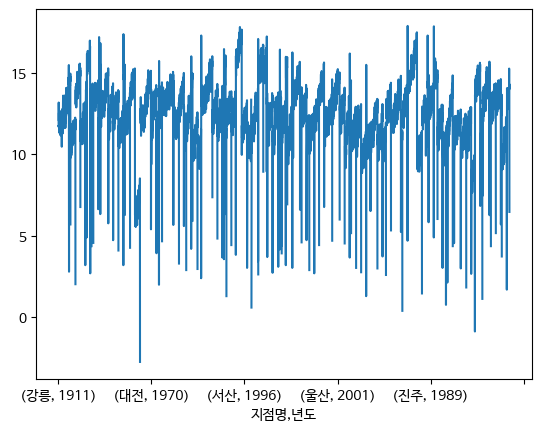

In [44]:
# 선그래프 그리기
df.groupby(['지점명','년도'])['평균기온'].agg('mean').plot()


### **Q5. 지점별 최고기온/최저기온은?**

In [45]:
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'})
df.groupby('지점명').aggregate({'최고기온':'max',
                            '최저기온':'min'})

,최고기온,최저기온
지점명,,
강릉,39.4,-20.2
강진군,37.4,-14.9
강화,35.8,-22.5
거제,38.6,-10.4
거창,37.8,-18.9
...,...,...
합천,39.5,-16.9
해남,37.2,-17.1
홍성,37.0,-21.1


- 인텍스를 초기화 하는 방법

In [ ]:
# 인텍스를 초기화 하는 방법
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
df.groupby('지점명').aggregate({'최고기온':'max'}).reset_index()

### [실습문제] : 지점별 년도별 최다 월합강수량?

In [46]:
df.groupby(['지점명','년도'])['월합강수량'].agg(**{'최다월합강수량':'max'})
df.groupby(['지점명','년도']).aggregate({'월합강수량':'max'})

월합강수량
지점명 년도         
강릉  1911   36.5
    1912  346.1
    1913  232.5
    1914  383.4
    1915  302.3
...         ...
흑산도 2020  305.2
    2021  176.0
    2022  131.4
    2023  590.5
    2024  102.3

[4849 rows x 1 columns]

### [실습문제]  제주 전역의 지점별+년도별 최고 최고기온, 최저 최저기온 ,최다 월합강수량, 최다 최심적실은?

In [50]:
df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'최고기온':'max',
                                          '최저기온':'min',
                                          '월합강수량':'max',
                                          '최심적설':'max'})

df2.to_csv('제주-년도별-날씨정보.csv', encoding='utf-8')
df2.head(10)

최고기온  최저기온  월합강수량  최심적설
지점명 년도                           
고산  1988  30.5  -2.1  207.4   0.5
    1989  30.5  -1.0  273.2   0.3
    1990  32.4  -3.5  205.8   2.7
    1991  31.4  -3.0  368.2   1.0
    1992  31.7   0.2  326.6   NaN
    1993  28.8  -1.5  354.8   0.5
    1994  33.1  -0.3  208.2   NaN
    1995  31.4   0.0  341.4   0.9
    1996  33.1  -1.5  216.9   0.4
    1997  31.5  -0.8  197.0   0.3

#### 6.가공된 파일 신규 저장하기

In [52]:
# 가공된 데이터 신규 파일로 저장하기
outfile = 'weather_data.csv'
df.to_csv(outfile, encoding='cp949', mode='w', index=True)

--------------------------

## 4. 데이터 시각화하기

### [실습] : 지점별 평균기온 그래프

<ipython-input-56-2353956b0d80>:29: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.savefig('./지점별그래프.png')
<ipython-input-56-2353956b0d80>:29: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.savefig('./지점별그래프.png')
<ipython-input-56-2353956b0d80>:29: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.savefig('./지점별그래프.png')
<ipython-input-56-2353956b0d80>:29: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.savefig('./지점별그래프.png')
<ipython-input-56-2353956b0d80>:29: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  plt.savefig('./지점별그래프.png')
<ipython-input-56-2353956b0d80>:29: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  plt.savefig('./지점별그래프.png')
<ipython-input-56-2353956b0d80>:29: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.savefig('./

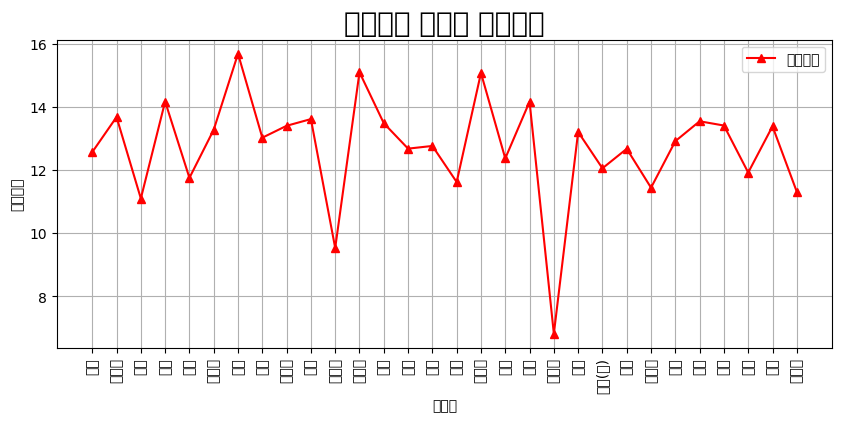

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'Nanum'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = 'OBS_ASOS_MNH_20240423121211.csv'
df = pd.read_csv(filename, encoding='cp949')
df

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)

# 3.지점별 평균 구하기(지점 30개만 추출)
df_ = df.groupby('지점명').aggregate({'평균기온':'mean'}).head(30)

plt.plot(df_, '^', linestyle='solid', c='red', label='평균기온')  ## df_ 는 위에서 정의, '^'는 마커
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점명'); plt.ylabel('평균기온');
plt.legend(); plt.grid();
plt.savefig('./지점별그래프.png')
plt.show()

### [실습문제] : '제주' 지점의 년도별 평균기온을  선 그래프로 나타내기

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

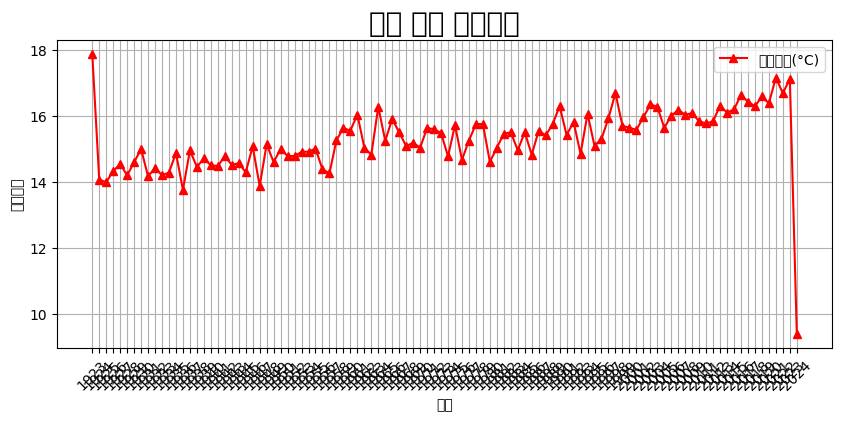

In [54]:
# 제주 지점 연도별 그룹핑하기
df_jeju = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df_jeju = df_jeju.groupby(['년도']).aggregate({'평균기온':'mean'}).reset_index()
X = df_jeju.년도
Y = df_jeju.평균기온


# 제주 지점 평균 구하기
plt.plot(X, Y, '^', linestyle='solid', c='r', label='평균기온(°C)')
plt.title('제주 지점 평균기온', fontsize=20)
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

### [실습]: 제주의 평균기온, 최고기온, 최저기온 통계를 그래프로 나타내기

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyth

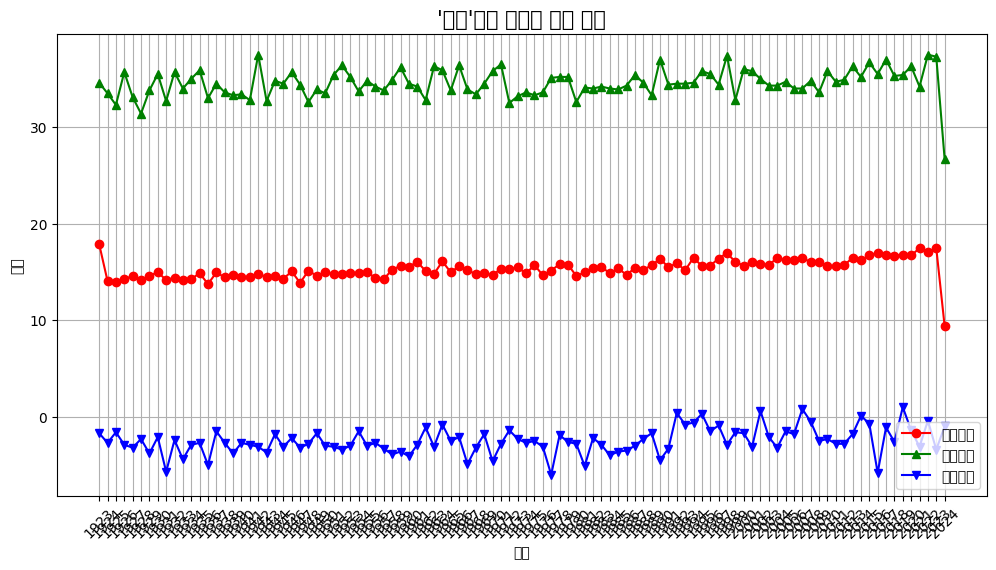

In [55]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도').평균기온.agg(**{'평균기온':'mean'})
data2 = data.groupby('년도').최고기온.agg(**{'최고기온':'max'})
data3 = data.groupby('년도').최저기온.agg(**{'최저기온':'min'})

# 3. 그래프로 시각화하기
plt.plot(data1, 'o', linestyle='solid', c='r', label='평균기온')
plt.plot(data2, '^', linestyle='solid', c='g', label='최고기온')
plt.plot(data3, 'v', linestyle='solid', c='b', label='최저기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')     # x축 레이블
plt.ylabel('기온')     # y축 레이블
plt.legend()           #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기
plt.grid()               # 격자 표시

plt.show()


In [ ]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,5))

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).reset_index()
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'}).reset_index()

# 3. 그래프로 시각화하기
X = data1['년도']
Y1 = data1['평균기온']
Y2 = data2['최고기온']
plt.bar(X, Y1, label='평균기온')
plt.plot(X, Y2, 'o', linestyle='solid', c='r', label='최고기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')        # x축 레이블
plt.ylabel('기온')        # y축 레이블
plt.legend()             #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기

plt.grid()               # 격자 표시

plt.show()

### [실습]: 제주의 최고기온(선그래프),평균기온(막대그래프)을 혼합 그래프로 나타내기

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

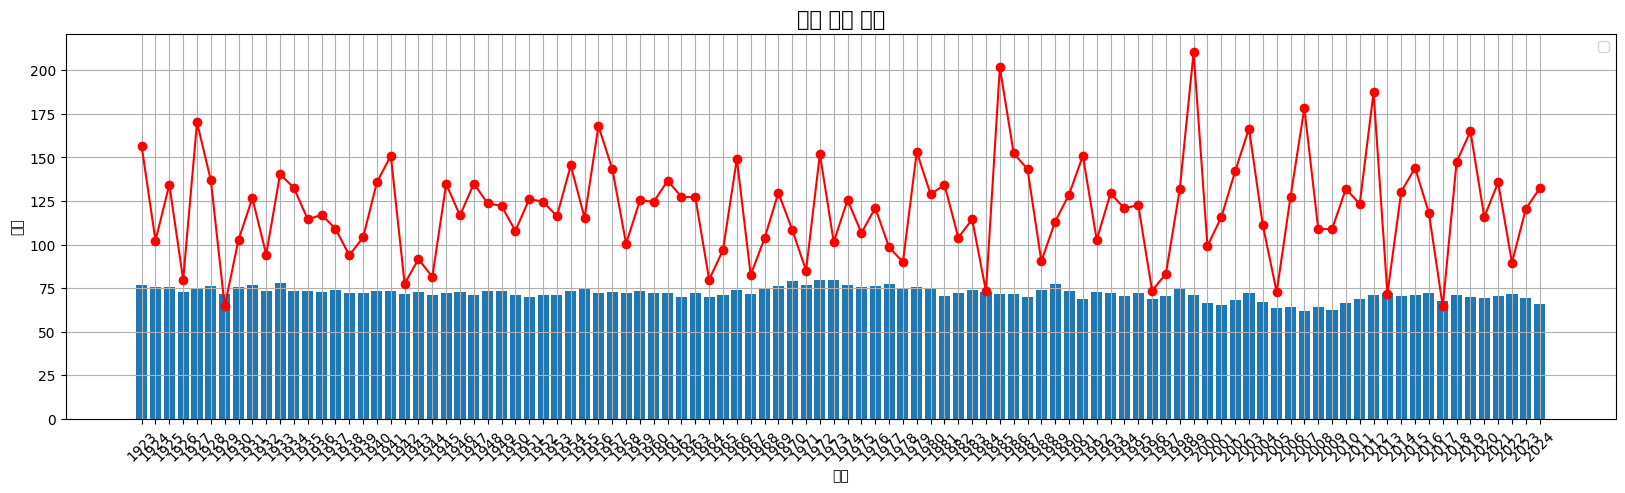

In [58]:
# 3. 그래프로 시각화하기
plt.figure(figsize=(20,5))
plt.title('제주 기온 통계', fontsize=15)         #제목
plt.legend(['최고기온','평균기온']) #범례,기본 위치 : loc='upper left'
plt.xlabel('년도')                 # x축 레이블
plt.ylabel('기온')                 # y축 레이블
plt.xticks(rotation=45)           # x축 레이블 기울이기
plt.grid()                        # 격자 표시

plt.bar(X, Y1)  # 막대 그래프
plt.plot(X, Y2, 'o', linestyle='solid', c='r')  # 선그래프
plt.show()


### [실습] : 2중 축 그래프 그리기 :  평균상대습도 & 월합강수량

<ipython-input-57-273f3ab4cd72>:26: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.savefig('image/graph.png')
<ipython-input-57-273f3ab4cd72>:26: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.savefig('image/graph.png')
<ipython-input-57-273f3ab4cd72>:26: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.savefig('image/graph.png')
<ipython-input-57-273f3ab4cd72>:26: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.savefig('image/graph.png')
<ipython-input-57-273f3ab4cd72>:26: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  plt.savefig('image/graph.png')
<ipython-input-57-273f3ab4cd72>:26: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.savefig('image/graph.png')
<ipython-input-57-273f3ab4cd72>:26: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font

FileNotFoundError: [Errno 2] No such file or directory: 'image/graph.png'

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fun

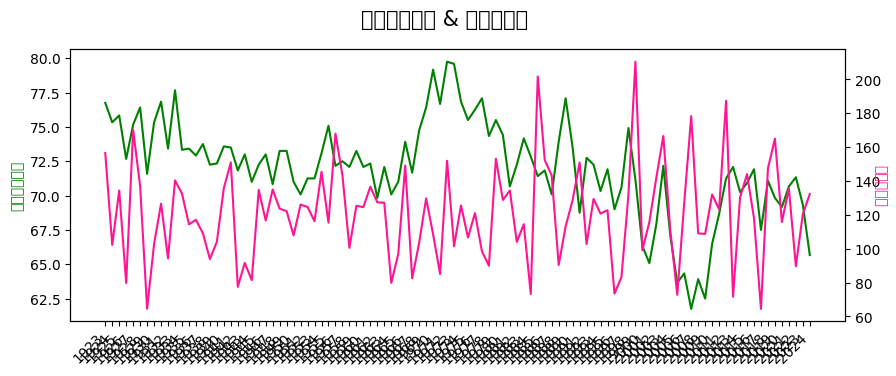

In [57]:
# 2.'제주'지점의 평균상대습도 & 일최다강수량 센터수
data = df.groupby(['지점명','년도'])['평균상대습도'].agg(**{'평균상대습도':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
X  = data['년도']
Y1 = data['평균상대습도']

data = df.groupby(['지점명','년도'])['월합강수량'].agg(**{'월합강수량':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
Y2 = data['월합강수량']
# print(Y2)


# 3. 그래프로 시각화하기
# 왼쪽 축 그래프
fig, ax1 = plt.subplots()
plt.suptitle('평균상대습도 & 월합강수량',fontsize=15)
ax1.plot(X, Y1, color='green')     # 평균상대습도 (왼쪽)
ax1.set_ylabel('평균상대습도', color = 'green', rotation = 90)

# 오른쪽 축 그래프
ax2 = ax1.twinx()                  ### ax2는 ax1 축을 그대로 복사해줘
ax2.plot(X, Y2, color='deeppink')  # 월합강수량 (오른쪽) ### 오른쪽 축을 보여줌
ax2.set_ylabel('월합강수량', color = 'deeppink', rotation = 270)  ### 타이틀이 나오는 방향도 위아래

fig.autofmt_xdate(rotation=45)  #X축 레이블 기울이기
plt.savefig('image/graph.png')
plt.show()

-------

---------

끝!